# Evolutionary multiobjective optimization

LEAP currently directly supports one form of multiobjective optimization, NSGA-II, but there is intent to implement other common evolutionary multiobjective algorithms.

## Naive evolutionary multiobjective optimization

A naive approach to evolutionary multiobjective optimization would be to simply sum up the fitnesses, biased by a weight, as a final, single fitness, $f(x)$:

$f(x) = \sum \limits_{i=0}^n w_i f_i$

Where $f_i$ is the fitness for objective _i_.

However, there isn't very satisfying because we have to decide on $w_i$, which we usually don't know. A better approach would be to evolve solutions along a Pareto front where each solution on the front dominates other solutions.

## NSGA-II

The NSGA-II algorithm is just one such evolutionary multiobjective optimization (MO) algorithm.

Deb, Kalyanmoy, Amrit Pratap, Sameer Agarwal, and T. A. M. T. Meyarivan.
"A Fast and Elitist Multiobjective Genetic Algorithm: NSGA-II." IEEE
transactions on evolutionary computation 6, no. 2 (2002): 182-197.


In [1]:
import sys
import pandas as pd

from leap_ec.representation import Representation
from leap_ec.ops import tournament_selection, clone, evaluate, pool
from leap_ec.real_rep.initializers import create_real_vector
from leap_ec.real_rep.ops import mutate_gaussian
from leap_ec.probe import print_individual
from leap_ec.global_vars import context

from leap_ec.multiobjective.nsga2 import nsga_2
from leap_ec.multiobjective.problems import SCHProblem

In [2]:
POP_SIZE=100
MAX_GENERATIONS=250

We supply one of the benchmark functions, Schaffer's Study (that we refer to as the "SCHProblem"), used in Deb's original paper that uses a single gene from which we calculate two separate fitnesses.

$f_1(x) = x^2$

$f_2(x) = (x - 2)^2$

For which there are two optimal solutinos, $x \in [0,2]$

In [3]:
sch_problem = SCHProblem() # TODO expand these separately with explanation


In [4]:
sch_representation = Representation(initialize=create_real_vector(bounds=[(-10, 10)]))

In [5]:
def print_generation(population):
    print(f"generation: {context['leap']['generation']}")
    return population

In [6]:
pipeline = [tournament_selection, 
            clone, 
            mutate_gaussian(std=0.5, expected_num_mutations=1),
            evaluate,
#             print_individual,
            pool(size=POP_SIZE),
            print_generation]

In [7]:
final_pop = nsga_2(max_generations=MAX_GENERATIONS, 
                   pop_size=POP_SIZE, 
                   problem=sch_problem, 
                   representation=sch_representation,
                   pipeline=pipeline)

generation: 0
generation: 1
generation: 2
generation: 3
generation: 4
generation: 5
generation: 6
generation: 7
generation: 8
generation: 9
generation: 10
generation: 11
generation: 12
generation: 13
generation: 14
generation: 15
generation: 16
generation: 17
generation: 18
generation: 19
generation: 20
generation: 21
generation: 22
generation: 23
generation: 24
generation: 25
generation: 26
generation: 27
generation: 28
generation: 29
generation: 30
generation: 31
generation: 32
generation: 33
generation: 34
generation: 35
generation: 36
generation: 37
generation: 38
generation: 39
generation: 40
generation: 41
generation: 42
generation: 43
generation: 44
generation: 45
generation: 46
generation: 47
generation: 48
generation: 49
generation: 50
generation: 51
generation: 52
generation: 53
generation: 54
generation: 55
generation: 56
generation: 57
generation: 58
generation: 59
generation: 60
generation: 61
generation: 62
generation: 63
generation: 64
generation: 65
generation: 66
gener

In [8]:
df = pd.DataFrame([(x.genome[0], x.fitness[0], x.fitness[1], x.rank, x.distance) for x in final_pop])

In [9]:
df.columns = ['gene','f1','f2','rank','distance']

In [10]:
df

,gene,f1,f2,rank,distance
0,0.000004,1.881472e-11,3.999983e+00,1,inf
1,2.000065,4.000259e+00,4.178424e-09,1,inf
2,1.820685,3.314895e+00,3.215373e-02,1,0.031205
3,1.495515,2.236564e+00,2.545055e-01,1,0.028274
4,1.766743,3.121381e+00,5.440885e-02,1,0.025996
...,...,...,...,...,...
95,0.115483,1.333624e-02,3.551406e+00,1,0.009033
96,0.779472,6.075761e-01,1.489689e+00,1,0.008844
97,0.667695,4.458165e-01,1.775037e+00,1,0.008722
98,0.478252,2.287250e-01,2.315717e+00,1,0.008686


<AxesSubplot:xlabel='f1', ylabel='f2'>

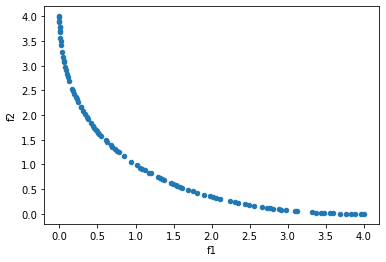

In [11]:
df.plot(x='f1',y='f2', kind='scatter')